**U.S. Airbnb Open Data**

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

#for splitting
from sklearn.model_selection import train_test_split

#the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

In [192]:
AirbnbData = pd.read_csv('AB_US_2023.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_4156\2652525239.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  AirbnbData = pd.read_csv('AB_US_2023.csv')


In [193]:
AirbnbData.all()

id                                 True
name                               True
host_id                            True
host_name                          True
neighbourhood_group                True
neighbourhood                      True
latitude                           True
longitude                          True
room_type                          True
price                             False
minimum_nights                     True
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count     True
availability_365                  False
number_of_reviews_ltm             False
city                               True
dtype: bool

In [194]:
AirbnbData.tail(15)

id                                               name  \
232132  848594164708230918      Comfort and Convenience! Kitchen, Onsite Pool   
232133  848595337740216125      Best Place to Stay in California! Onsite Pool   
232134  848595461988821158       Tour Around California! Parking, Onsite Pool   
232135  848595469433755139       Always a Great Idea To Unwind! Kitchen, Pool   
232136  848598198524262338         You Found it! Onsite Pool, Free Breakfast!   
232137  848598295563877894      Relax and Unwind! Free Breakfast, Onsite Pool   
232138  848598417306295259      Convenient Stay! Full Kitchen, Free Breakfast   
232139  848598838858396438     Enjoy a Hassle-Free Stay, Free Breakfast, Pool   
232140  848598943985944467     Best Value, Quality Stay! Pool, Free Breakfast   
232141  848599061203137315    Pets are Welcome! Outdoor Pool, Free Breakfast!   
232142  849230448624862502  Private Half Moon Bay Oasis By Pillar Point Be...   
232143  850805127216414630                                      Home near SFO   
232144  851562104616413652                   Modern New Private Studio in SFO   
232145  851792795339759410            Lux Bedroom with a Shared Bath near SFO   
232146  851801296770555568             Lux Bedroom with Private Bath near SFO   

          host_id   host_name neighbourhood_group         neighbourhood  \
232132  501999514   RoomPicks                 NaN             San Bruno   
232133  501999514   RoomPicks                 NaN             San Bruno   
232134  501999514   RoomPicks                 NaN   South San Francisco   
232135  501999514   RoomPicks                 NaN   South San Francisco   
232136  501999514   RoomPicks                 NaN   South San Francisco   
232137  501999514   RoomPicks                 NaN   South San Francisco   
232138  501999514   RoomPicks                 NaN   South San Francisco   
232139  501999514   RoomPicks                 NaN             San Bruno   
232140  501999514   RoomPicks                 NaN   South San Francisco   
232141  501999514   RoomPicks                 NaN             San Bruno   
232142   29395385      Khalid                 NaN  Unincorporated Areas   
232143  440957696   Christina                 NaN             San Bruno   
232144   41574587      Vality                 NaN   South San Francisco   
232145   73133543  Stephannie                 NaN   South San Francisco   
232146   73133543  Stephannie                 NaN   South San Francisco   

         latitude   longitude        room_type  price  minimum_nights  \
232132  37.640498 -122.418462  Entire home/apt    290               1   
232133  37.640306 -122.418981  Entire home/apt    323               1   
232134  37.642191 -122.419528  Entire home/apt    323               1   
232135  37.642353 -122.419012  Entire home/apt    323               1   
232136  37.642415 -122.419779  Entire home/apt    221               1   
232137  37.642240 -122.420220  Entire home/apt    221               1   
232138  37.642269 -122.420396  Entire home/apt    221               1   
232139  37.640766 -122.418405  Entire home/apt    221               1   
232140  37.642419 -122.419679  Entire home/apt    221               1   
232141  37.640760 -122.418061  Entire home/apt    221               1   
232142  37.506164 -122.476188  Entire home/apt    389               2   
232143  37.623630 -122.426570  Entire home/apt    158               1   
232144  37.655661 -122.413130  Entire home/apt     97               1   
232145  37.644792 -122.454213     Private room     62               2   
232146  37.642655 -122.452391     Private room     85               2   

        number_of_reviews last_review  reviews_per_month  \
232132                  0         NaN                NaN   
232133                  0         NaN                NaN   
232134                  0         NaN                NaN   
232135                  0         NaN                NaN   
232136                  0         NaN                NaN 

In [195]:
#dropping unnessassary data

AirbnbData.drop(['id', 'last_review', 'neighbourhood_group', 'host_id', 'reviews_per_month', 'name', 'host_name'], axis=1, inplace=True)

In [196]:
#lets try something diff

# AirbnbData.drop(['neighbourhood', 'city'], axis=1, inplace=True)

In [197]:
#onehot encoding

AirbnbData_encoded = pd.get_dummies(AirbnbData, columns=['neighbourhood', 'city', 'room_type'], drop_first=False)

In [198]:
#find missing values

missing_values = AirbnbData_encoded.isnull().sum()
print(missing_values)

latitude                     0
longitude                    0
price                        0
minimum_nights               0
number_of_reviews            0
                            ..
city_Washington D.C.         0
room_type_Entire home/apt    0
room_type_Hotel room         0
room_type_Private room       0
room_type_Shared room        0
Length: 1451, dtype: int64


In [199]:
AirbnbData_encoded.head(15)

latitude  longitude  price  minimum_nights  number_of_reviews  \
0   37.77028 -122.43317    202               2                383   
1   37.74474 -122.42089    235              30                111   
2   37.76555 -122.45213     56              32                  9   
3   37.77564 -122.43642    575               9                 28   
4   37.76030 -122.42197    110               1                770   
5   37.71750 -122.39698     95               1                 19   
6   37.78440 -122.47932    259               5                234   
7   37.74766 -122.42041    100              30                 80   
8   37.79249 -122.41499     79              30                 18   
9   37.76901 -122.44701     65              32                  7   
10  37.77196 -122.43477    425               2                 56   
11  37.76932 -122.44723     65              32                  5   
12  37.76237 -122.42992     99               3                446   
13  37.78546 -122.46148    545               3                 22   
14  37.74916 -122.42971     95              30                 69   

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                                1               128                     59   
1                                1               365                      0   
2                               13               365                      1   
3                                2               365                      0   
4                                2               159                     34   
5                                2               365                      1   
6                                1                32                     13   
7                                1               331                      1   
8                                1               230                      0   
9                               13               365                      1   
10                               1                 7                     14   
11                              13               365                      0   
12                               1                 7                     19   
13                               1                64                      0   
14                               1               192                      2   

    neighbourhood_28704  neighbourhood_28715  ...  city_San Mateo County  \
0                 False                False  ...                  False   
1                 False                False  ...                  False   
2                 False                False  ...                  False   
3                 False                False  ...                  False   
4                 False                False  ...                  False   
5                 False                False  ...                  False   
6                 False                False  ...                  False   
7                 False                False  ...                  False   
8                 False                False  ...                  False   
9                 False                False  ...                  False   
10                False                False  ...                  False   
11                False                False  ...                  False   
12                False                False  ...                  False   
13                False                False  ...                  False   
14                False                False  ...                  False   

    city_Santa Clara County  city_Santa Cruz County  city_Seattle  \
0                     False                   False         False   
1                     False                   False         False   
2                     False                   False         False   
3                     False                   False         False   
4                     False                   False         False   
5  

# EDA Graphs

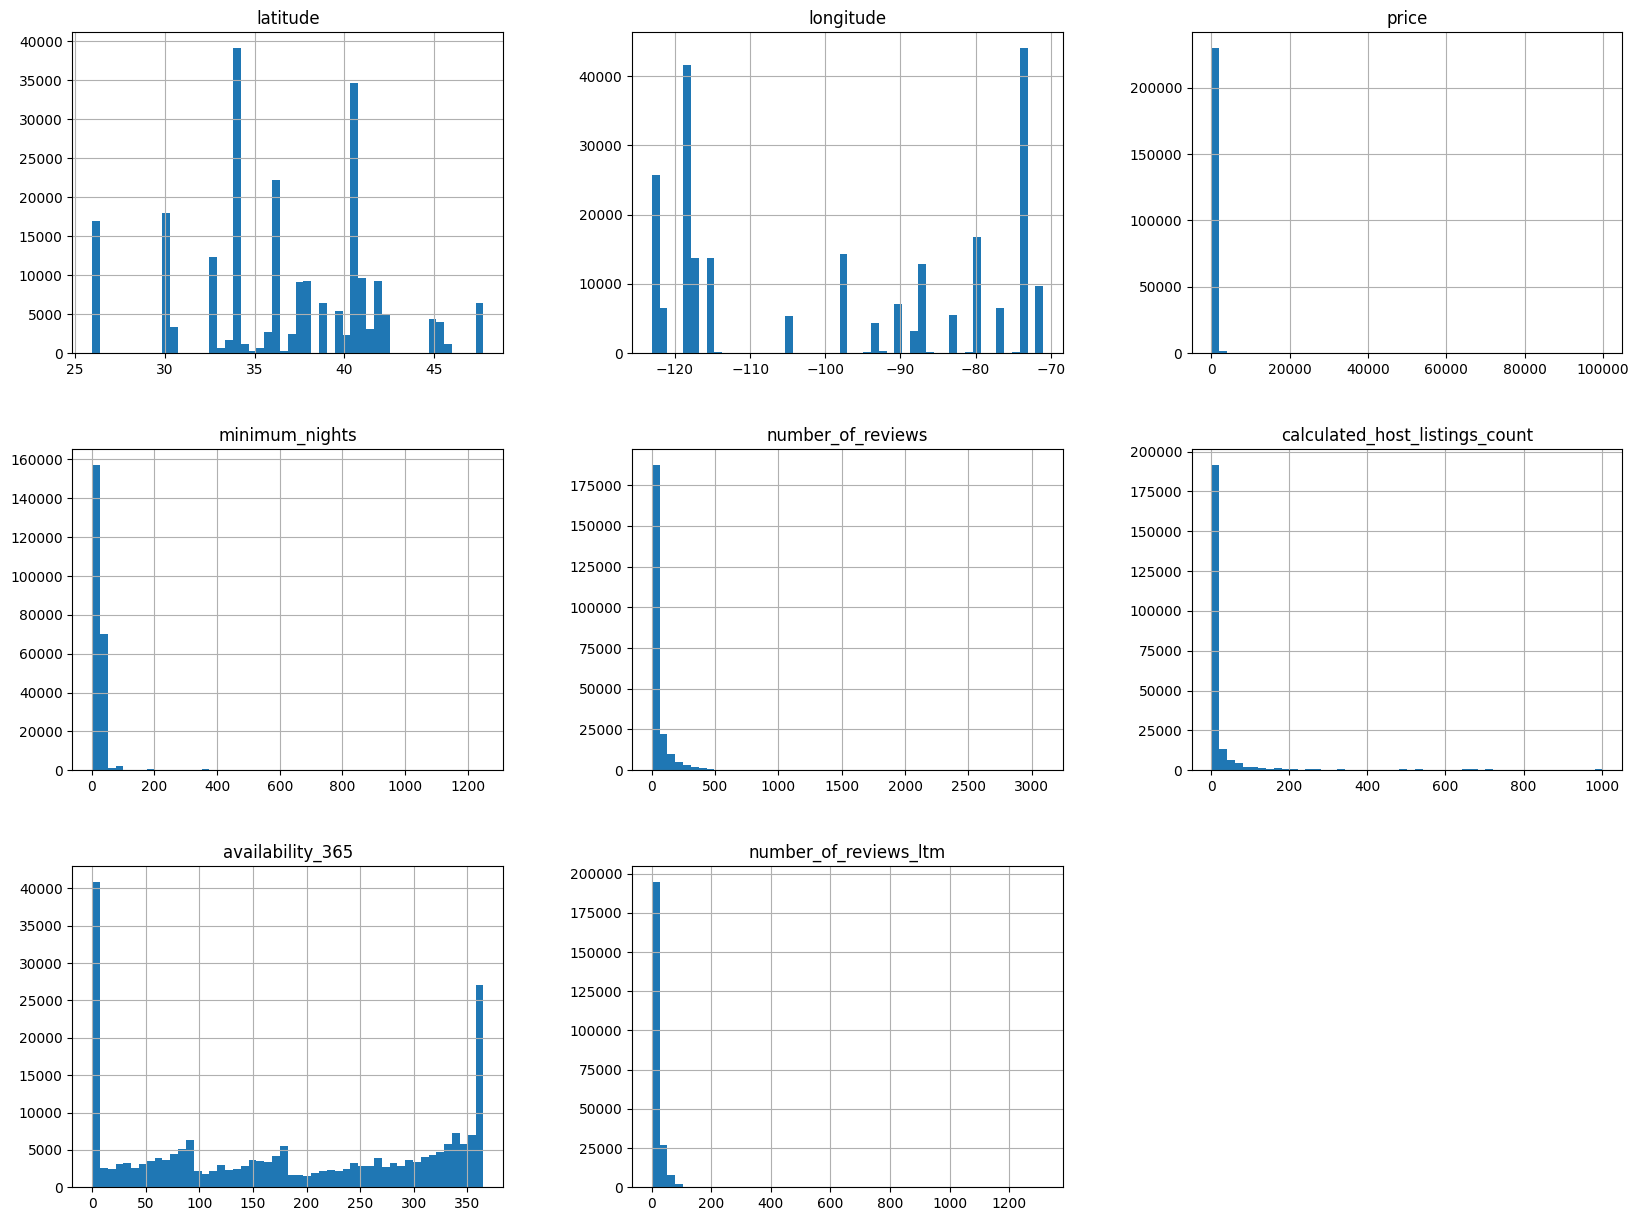

In [200]:
# Summary statistics for numerical columns
summary_statistics = AirbnbData.describe()

# Distributions of numerical features
import matplotlib.pyplot as plt
AirbnbData_encoded.hist(bins=50, figsize=(20,15))
plt.show()

In [201]:
# Select the numeric columns for checking for correlation 
numeric_cols = AirbnbData.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

# look at how everything correlates to price
price_correlations = correlation_matrix["price"].sort_values(ascending=False)
print(price_correlations)

print("--------------------")

# look at how everything correlates to no of reviews
price_correlations = correlation_matrix["number_of_reviews"].sort_values(ascending=False)
print(price_correlations)

price                             1.000000
calculated_host_listings_count    0.018823
availability_365                  0.015663
minimum_nights                   -0.022933
longitude                        -0.023272
number_of_reviews_ltm            -0.035012
number_of_reviews                -0.035233
latitude                         -0.041702
Name: price, dtype: float64
--------------------
number_of_reviews                 1.000000
number_of_reviews_ltm             0.676836
latitude                          0.035587
availability_365                 -0.027564
price                            -0.035233
longitude                        -0.051300
calculated_host_listings_count   -0.107552
minimum_nights                   -0.126818
Name: number_of_reviews, dtype: float64


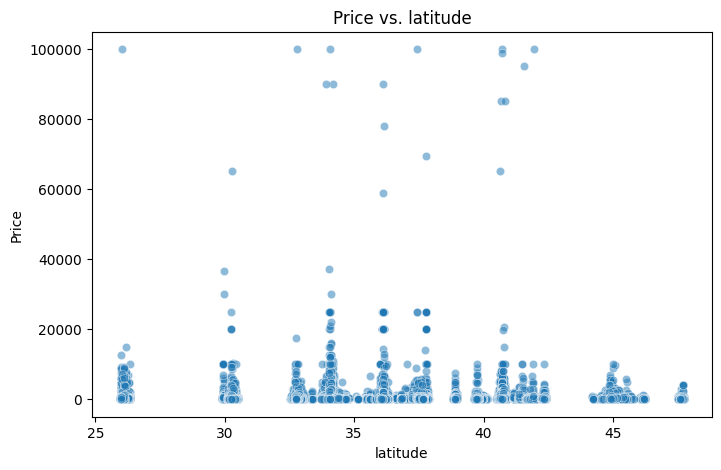

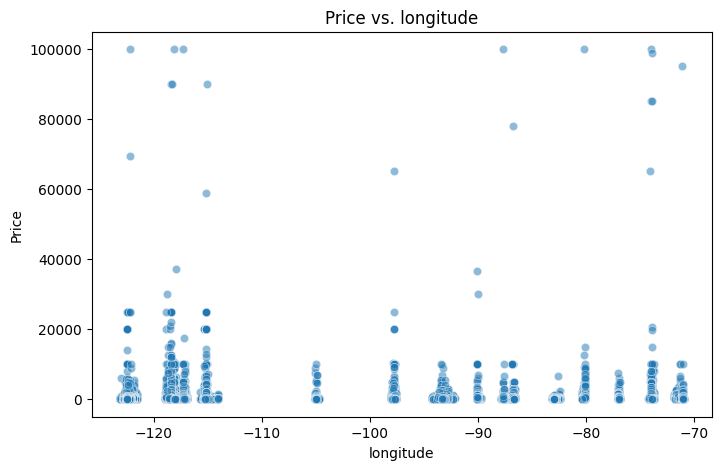

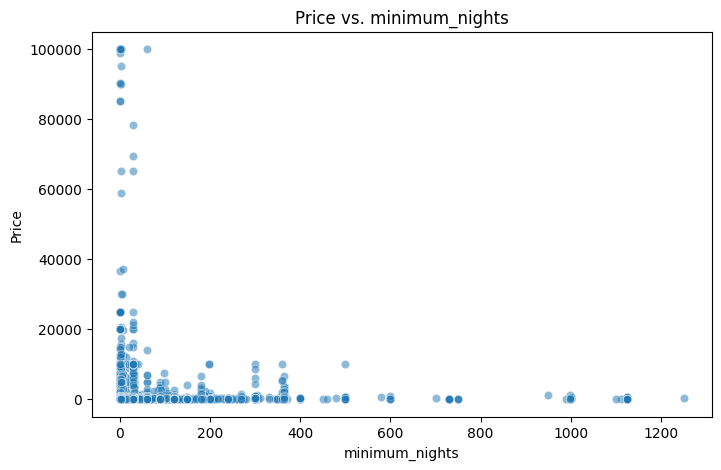

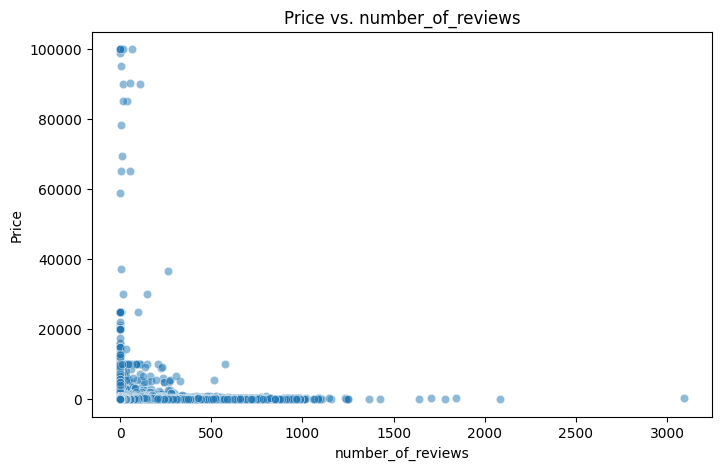

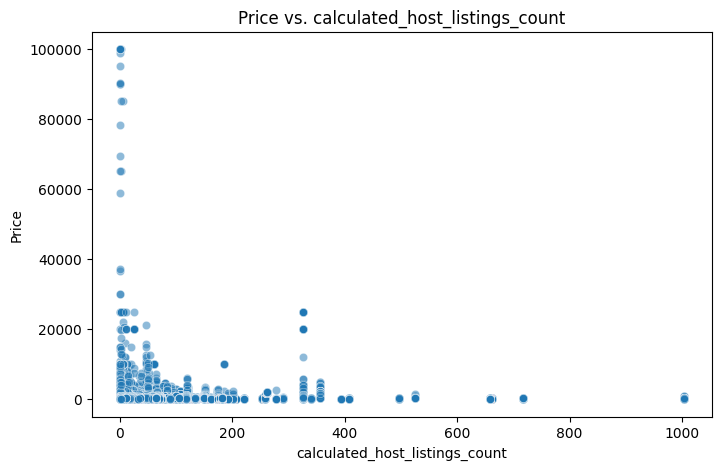

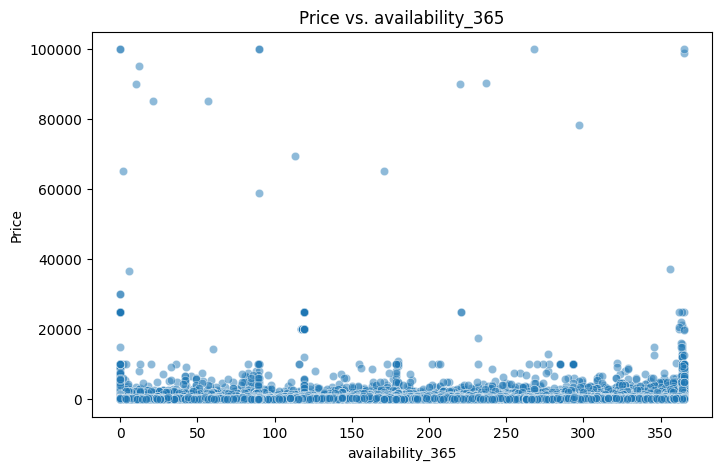

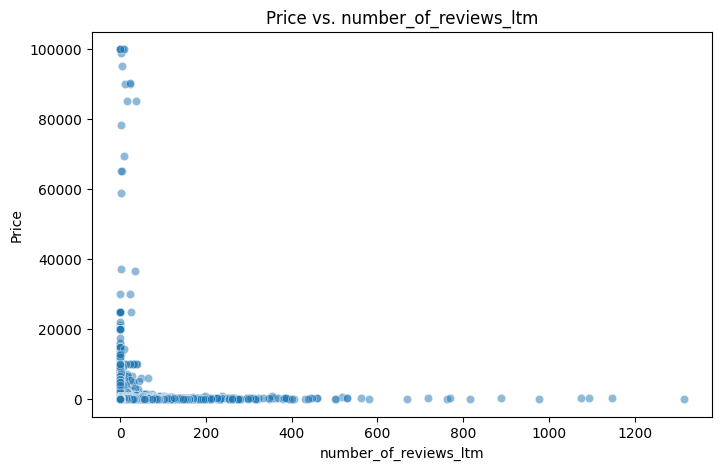

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns (excluding 'price' to avoid plotting it against itself)
numeric_cols = AirbnbData.select_dtypes(include=['int64', 'float64']).columns.drop('price')

# Plotting
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=AirbnbData, x=col, y='price', alpha=0.5)
    plt.title(f'Price vs. {col}')
    plt.ylabel('Price')
    plt.xlabel(col)
    plt.show()


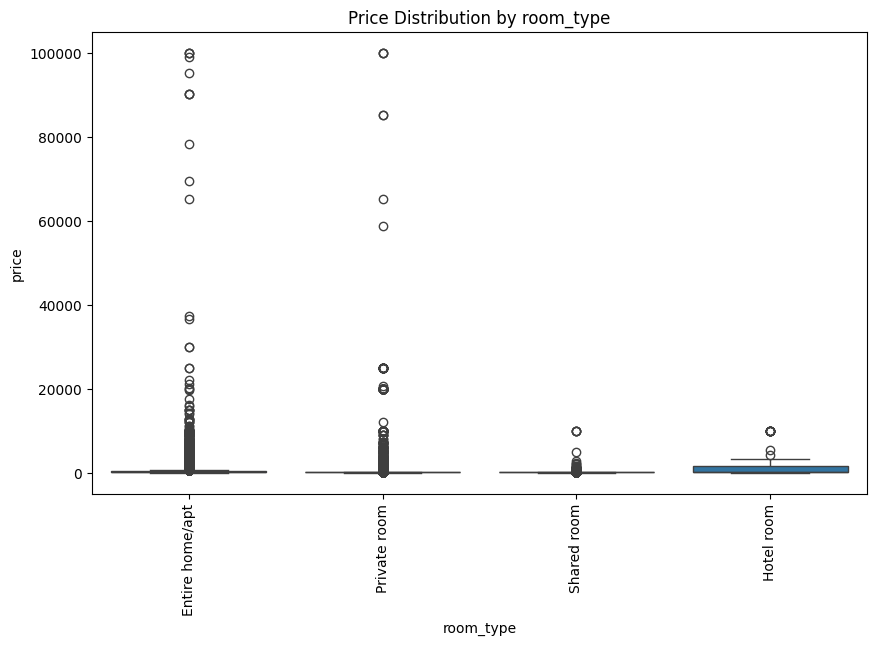

In [203]:
# 'room_type' is categorical
categorical_cols = ['room_type']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=AirbnbData, x=col, y='price')
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=90)  # Rotate labels to avoid overlap
    plt.show()


## Problem

the graphs above are not very good visualizations as the data is skewed(?)

## Solution

Take logarithm of price to get a better visualization

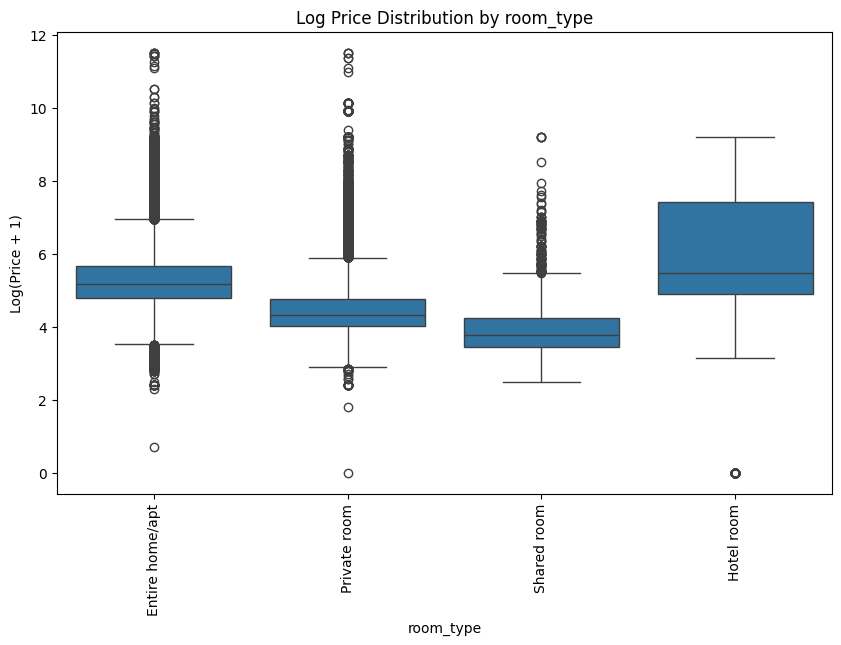

In [204]:
categorical_cols = ['room_type']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    # Apply log transformation to 'price' and plot
    sns.boxplot(data=AirbnbData, x=col, y=np.log1p(AirbnbData['price']))
    plt.title(f'Log Price Distribution by {col}')
    plt.ylabel('Log(Price + 1)')  # Update label to reflect the transformation
    plt.xticks(rotation=90)  # Rotate labels to avoid overlap
    plt.show()

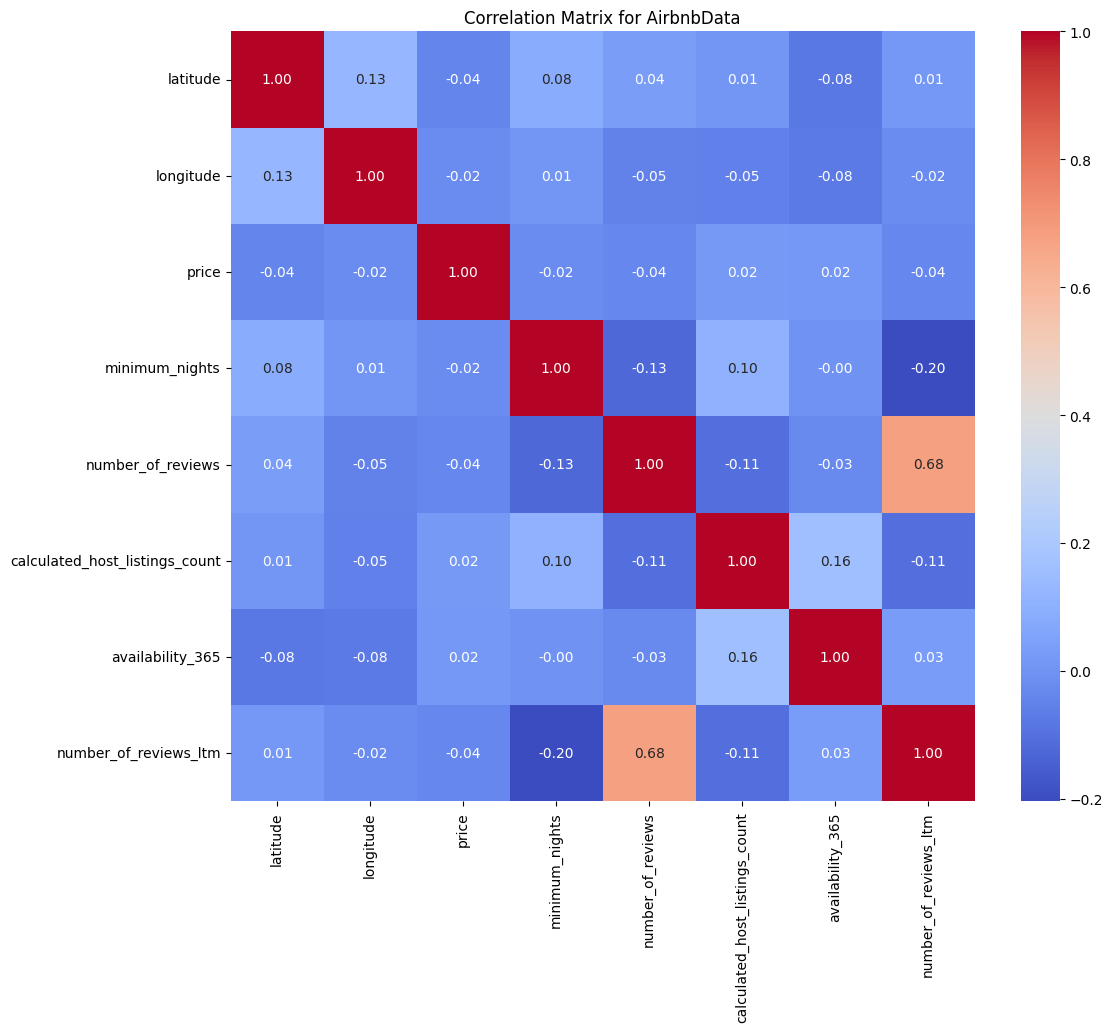

In [205]:
# For AirbnbData, focusing on numeric columns
numeric_cols_df = AirbnbData.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix_airbnb = numeric_cols_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_airbnb, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for AirbnbData')
plt.show()

# DIDNT DO ANY GOOD TO REMOVE OUTLIERS

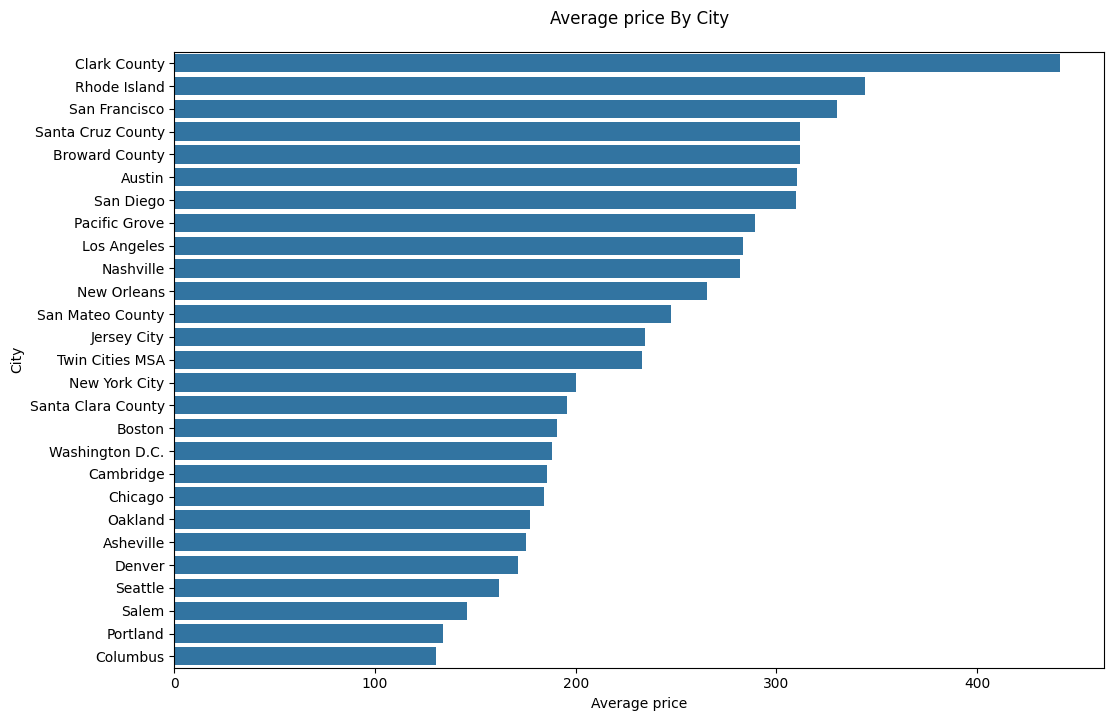

In [206]:
average_price_by_city = AirbnbData.groupby('city')['price'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_city.values, y=average_price_by_city.index)
plt.title('Average price By City', pad=20)
plt.xlabel('Average price')
plt.ylabel('City')

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4156\4052912406.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels())  # Rotate y-tick labels to reduce overlap
C:\Users\User\AppData\Local\Temp\ipykernel_4156\4052912406.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels())  # Rotate y-tick labels to reduce overlap
C:\Users\User\AppData\Local\Temp\ipykernel_4156\4052912406.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels())  # Rotate y-tick labels to reduce overlap
C:\Users\User\AppData\Local\Temp\ipykernel_4156\4052912406.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ti

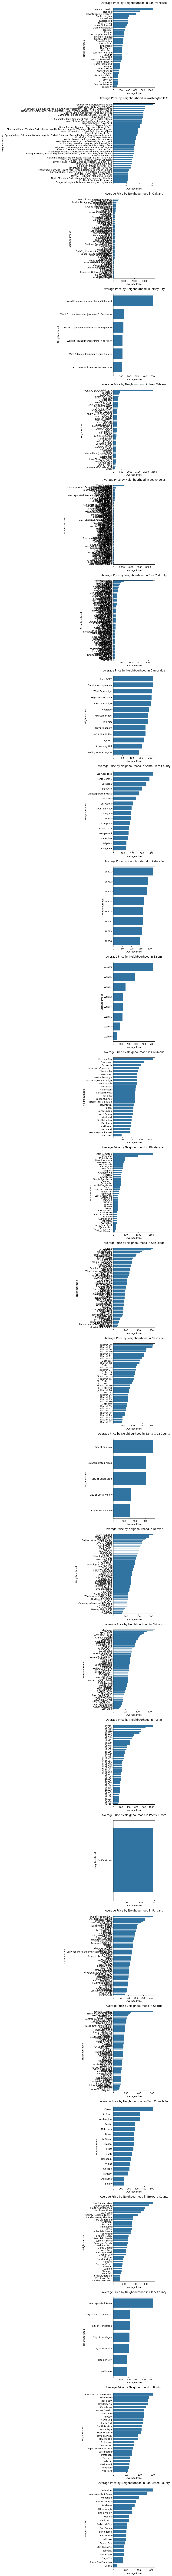

In [207]:
# Get unq. cirties
cities = AirbnbData['city'].unique()


fig, axes = plt.subplots(nrows=len(cities), ncols=1, figsize=(10, 6 * len(cities)))

# Loop through each city to create a plot
for index, city in enumerate(cities):
    # Filter the data for the current city
    city_data = AirbnbData[AirbnbData['city'] == city]
    
    # Calculate the average price by neighbourhood
    average_price_by_neighbourhood = city_data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
    
    # Plot on the respective subplot
    ax = axes[index]
    sns.barplot(x=average_price_by_neighbourhood.values, y=average_price_by_neighbourhood.index, ax=ax)
    ax.set_title(f'Average Price by Neighbourhood in {city}', pad=20)
    ax.set_xlabel('Average Price')
    ax.set_ylabel('Neighbourhood')
    ax.tick_params(axis='y', labelsize=10)  # Adjust y-tick label size
    ax.set_yticklabels(ax.get_yticklabels())  # Rotate y-tick labels to reduce overlap

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4156\2253727824.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_stats_by_city_reset, x='price_range', y='city', palette='coolwarm', orient='h')


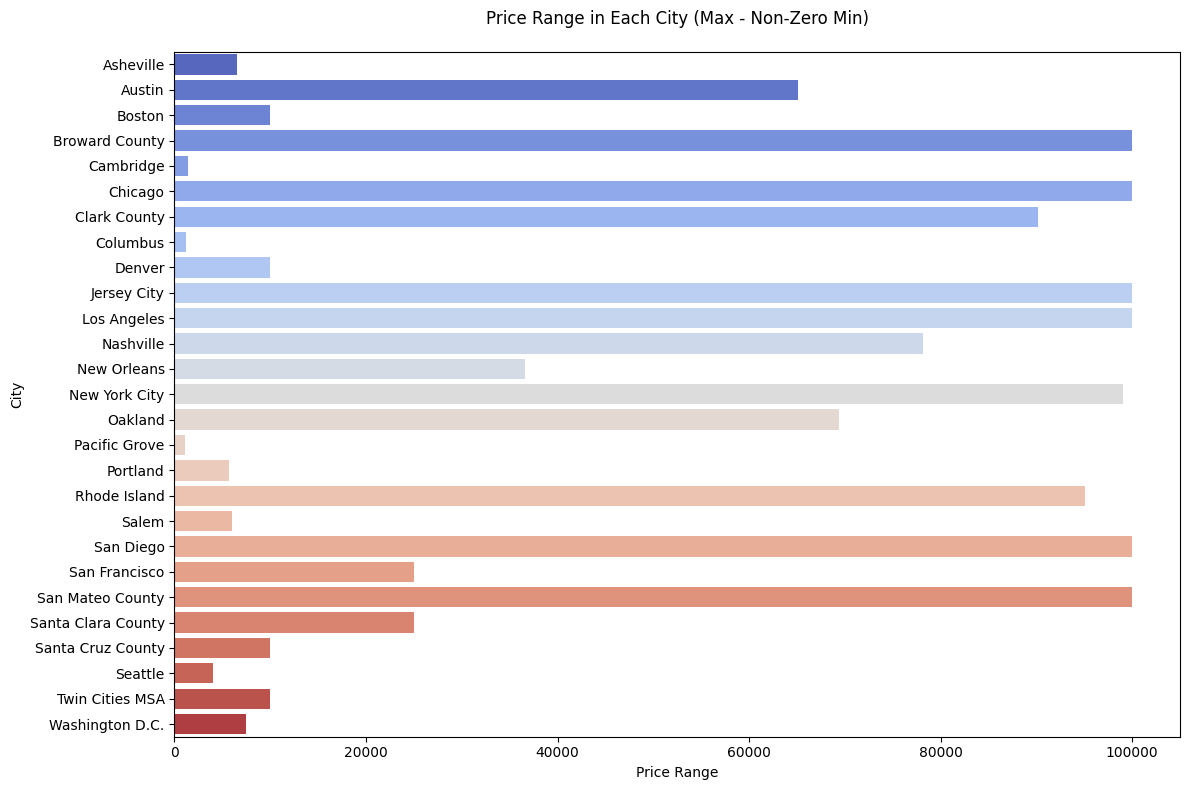

In [208]:
non_zero_prices = AirbnbData[AirbnbData['price'] > 0]

price_stats_by_city = non_zero_prices.groupby('city')['price'].agg(nonzero_min='min', max='max')


price_stats_by_city['price_range'] = price_stats_by_city['max'] - price_stats_by_city['nonzero_min']


price_stats_by_city_reset = price_stats_by_city.reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=price_stats_by_city_reset, x='price_range', y='city', palette='coolwarm', orient='h')
plt.title('Price Range in Each City (Max - Non-Zero Min)', pad=20)
plt.xlabel('Price Range')
plt.ylabel('City')
plt.tight_layout()

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4156\2952485086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_room_type.values, y=average_price_by_room_type.index, palette='coolwarm')


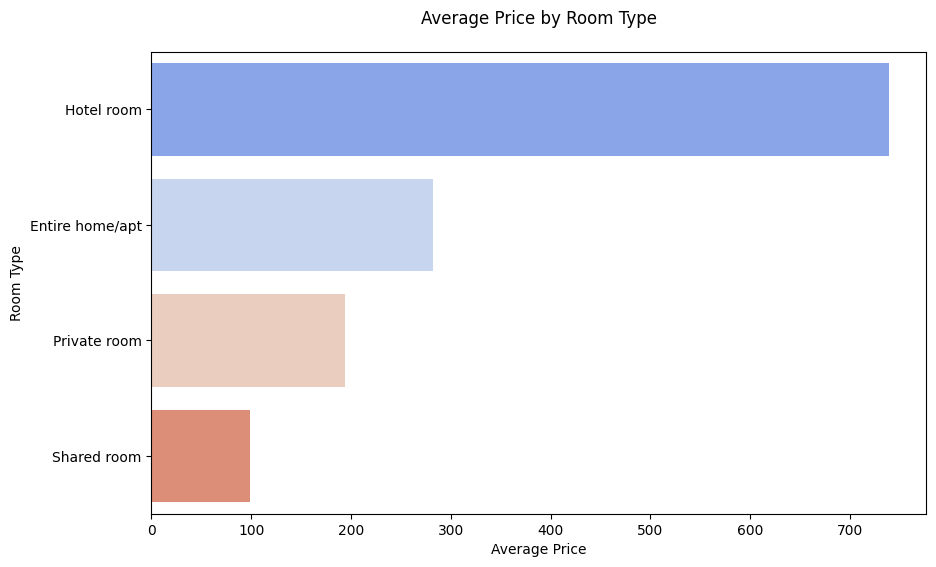

In [209]:
average_price_by_room_type = AirbnbData.groupby('room_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_room_type.values, y=average_price_by_room_type.index, palette='coolwarm')
plt.title('Average Price by Room Type', pad=20)
plt.xlabel('Average Price')
plt.ylabel('Room Type')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4156\2792764533.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_nights_range = AirbnbData.groupby('minimum_nights_range')['price'].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_4156\2792764533.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_nights_range.index, y=avg_price_by_nights_range.values, palette='coolwarm')


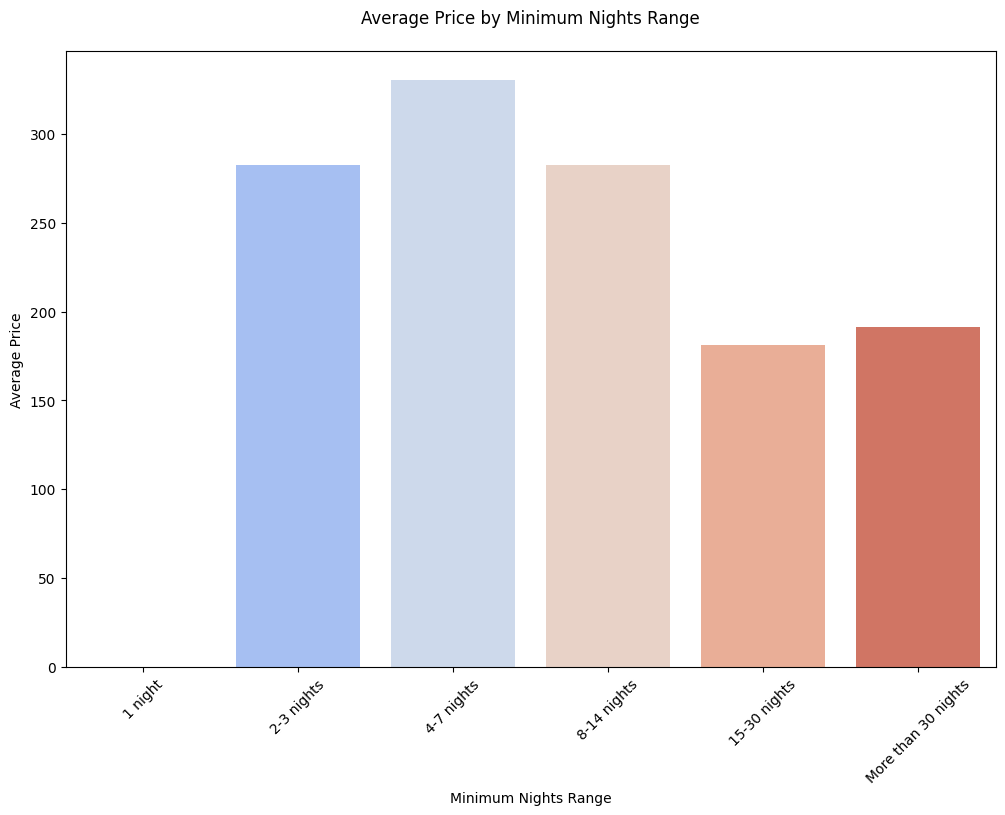

In [210]:
# Define bins and labels for the minimum_nights ranges
bins = [0, 1, 3, 7, 14, 30, AirbnbData['minimum_nights'].max()]
labels = ['1 night', '2-3 nights', '4-7 nights', '8-14 nights', '15-30 nights', 'More than 30 nights']

# Categorize minimum_nights into the defined ranges
AirbnbData['minimum_nights_range'] = pd.cut(AirbnbData['minimum_nights'], bins=bins, labels=labels, right=False)


avg_price_by_nights_range = AirbnbData.groupby('minimum_nights_range')['price'].mean()


plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_by_nights_range.index, y=avg_price_by_nights_range.values, palette='coolwarm')
plt.title('Average Price by Minimum Nights Range', pad=20)
plt.xlabel('Minimum Nights Range')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

# TRAINING THE MODEL

Set up feature matrix and target variable

In [211]:
X = AirbnbData_encoded.drop('price', axis=1)  # Feature matrix
y = AirbnbData_encoded['price']  # Target variable

Split the data

In [212]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Instantiating the linear regression model & fitting it to the dataset.

In [213]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [214]:
predictions = model.predict(X_test)

In [215]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7.432059409910366e+16
R-squared: -66006043966.424706


In [216]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [217]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_log)

predictions_log = model.predict(X_test_scaled)

In [218]:
mse = mean_squared_error(y_test_log, predictions_log)
r2 = r2_score(y_test_log, predictions_log)

print(f"Mean Squared Error (log scale): {mse}")
print(f"R-squared (log scale): {r2}")

Mean Squared Error (log scale): 2.1624510722390617e+21
R-squared (log scale): -3.2108384341153106e+21


# Training the Model (New Version)

In [219]:
# Reload the data
airbnb_data = pd.read_csv('AB_US_2023.csv')

# We drop the columns that are non-numerical and are unlikely to influence the prices of the listings.
columns_to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review', 'neighbourhood_group','neighbourhood']
airbnb_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# These are columns that needs to be one-hot encoded.
nonNumericalCategories = ['room_type', 'city']

# These are numerical columns that we don't want to one-hot encode
numericalCategories = airbnb_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the price which is the target variable
numericalCategories.remove('price') 

C:\Users\User\AppData\Local\Temp\ipykernel_4156\4122044640.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_data = pd.read_csv('AB_US_2023.csv')


In [220]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Handle missing values for numerical features with the median and for categorical with the most frequent value
changeNullNumericalData = SimpleImputer(strategy='median')
airbnb_data[numericalCategories] = changeNullNumericalData.fit_transform(airbnb_data[numericalCategories])

changeNullData = SimpleImputer(strategy='most_frequent')
airbnb_data[nonNumericalCategories] = changeNullData.fit_transform(airbnb_data[nonNumericalCategories])

# One-hot encode the categorical features
airbnb_data = pd.get_dummies(airbnb_data, columns=nonNumericalCategories, drop_first=True)

In [221]:
# Remove the outliers of the dataset.
Q1 = airbnb_data['price'].quantile(0.25) #This part was only used for testing.
Q3 = airbnb_data['price'].quantile(0.50)  
Outlier = Q3 - Q1
upper_bound = Q3 + 3 * Outlier
filtered_data = airbnb_data[(airbnb_data['price'] >= Q1 - 1.5 * Outlier) & (airbnb_data['price'] <= upper_bound)]
airbnb_data_filtered = airbnb_data[(airbnb_data['price'] <= upper_bound)]

In [222]:
# Filter the airbnb data by removing the price in the set.
X_filtered = airbnb_data_filtered.drop('price', axis=1)
y_filtered = airbnb_data_filtered['price']

# Then we split the data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

# Now train the linear regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

model = LinearRegression()
model.fit(X_train_scaled, y_train_filtered)

LinearRegression()

In [223]:
# Calculate the Mean Squared Error and the R-squared
y_pred_filtered = model.predict(X_test_scaled)
mse = mean_squared_error(y_test_filtered, y_pred_filtered)
r2 = r2_score(y_test_filtered, y_pred_filtered)


print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R-squared: { r2}")

Linear Regression - Mean Squared Error: 3730.895141893846
Linear Regression - R-squared: 0.2798401394212706


# Training the Model with 3 Different Algorithms

In [224]:
datas = pd.read_csv('AB_US_2023.csv')
data1 = datas
datas


C:\Users\User\AppData\Local\Temp\ipykernel_4156\2916181145.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  datas = pd.read_csv('AB_US_2023.csv')


id                                               name  \
0                      958              Bright, Modern Garden Unit - 1BR/1BTH   
1                     5858                                 Creative Sanctuary   
2                     8142  Friendly Room Apt. Style -UCSF/USF - San Franc...   
3                     8339                    Historic Alamo Square Victorian   
4                     8739                Mission Sunshine, with Private Bath   
...                    ...                                                ...   
232142  849230448624862502  Private Half Moon Bay Oasis By Pillar Point Be...   
232143  850805127216414630                                      Home near SFO   
232144  851562104616413652                   Modern New Private Studio in SFO   
232145  851792795339759410            Lux Bedroom with a Shared Bath near SFO   
232146  851801296770555568             Lux Bedroom with Private Bath near SFO   

          host_id         host_name neighbourhood_group         neighbourhood  \
0            1169             Holly                 NaN      Western Addition   
1            8904  Philip And Tania                 NaN        Bernal Heights   
2           21994             Aaron                 NaN        Haight Ashbury   
3           24215              Rosy                 NaN      Western Addition   
4            7149      Ivan & Wendy                 NaN               Mission   
...           ...               ...                 ...                   ...   
232142   29395385            Khalid                 NaN  Unincorporated Areas   
232143  440957696         Christina                 NaN             San Bruno   
232144   41574587            Vality                 NaN   South San Francisco   
232145   73133543        Stephannie                 NaN   South San Francisco   
232146   73133543        Stephannie                 NaN   South San Francisco   

         latitude   longitude        room_type  price  minimum_nights  \
0       37.770280 -122.433170  Entire home/apt    202               2   
1       37.744740 -122.420890  Entire home/apt    235              30   
2       37.765550 -122.452130     Private room     56              32   
3       37.775640 -122.436420  Entire home/apt    575               9   
4       37.760300 -122.421970     Private room    110               1   
...           ...         ...              ...    ...             ...   
232142  37.506164 -122.476188  Entire home/apt    389               2   
232143  37.623630 -122.426570  Entire home/apt    158               1   
232144  37.655661 -122.413130  Entire home/apt     97               1   
232145  37.644792 -122.454213     Private room     62               2   
232146  37.642655 -122.452391     Private room     85               2   

        number_of_reviews last_review  reviews_per_month  \
0                     383  2023-02-19               2.31   
1                     111  2017-08-06               0.66   
2                       9  2022-10-27               0.09   
3                      28  2019-06-28               0.17   
4                     770  2023-02-25               4.65   
...                   ...         ...                ...   
232142                  0         NaN                NaN   
232143                  0         NaN                NaN   
232144                  0         NaN                NaN   
232145                  0         NaN                NaN   
232146                  0         NaN                NaN   

        calculated_host_listings_count  availability_365  \
0                                    1               128   
1                                    1               365   
2                                   13               365   
3                                    2               365   
4                                    2               159   
...                                ...               ...   
232142                               1               365   


In [225]:
datas.head(5)

id                                               name  host_id  \
0   958              Bright, Modern Garden Unit - 1BR/1BTH     1169   
1  5858                                 Creative Sanctuary     8904   
2  8142  Friendly Room Apt. Style -UCSF/USF - San Franc...    21994   
3  8339                    Historic Alamo Square Victorian    24215   
4  8739                Mission Sunshine, with Private Bath     7149   

          host_name neighbourhood_group     neighbourhood  latitude  \
0             Holly                 NaN  Western Addition  37.77028   
1  Philip And Tania                 NaN    Bernal Heights  37.74474   
2             Aaron                 NaN    Haight Ashbury  37.76555   
3              Rosy                 NaN  Western Addition  37.77564   
4      Ivan & Wendy                 NaN           Mission  37.76030   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -122.43317  Entire home/apt    202               2                383   
1 -122.42089  Entire home/apt    235              30                111   
2 -122.45213     Private room     56              32                  9   
3 -122.43642  Entire home/apt    575               9                 28   
4 -122.42197     Private room    110               1                770   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2023-02-19               2.31                               1   
1  2017-08-06               0.66                               1   
2  2022-10-27               0.09                              13   
3  2019-06-28               0.17                               2   
4  2023-02-25               4.65                               2   

   availability_365  number_of_reviews_ltm           city  
0               128                     59  San Francisco  
1               365                      0  San Francisco  
2               365                      1  San Francisco  
3               365                      0  San Francisco  
4               159                     34  San Francisco

In [226]:
datas.describe()

id       host_id       latitude      longitude  \
count  2.321470e+05  2.321470e+05  232147.000000  232147.000000   
mean   2.584580e+17  1.582248e+08      36.610585     -98.301436   
std    3.465985e+17  1.587164e+08       5.126523      19.706929   
min    6.000000e+00  2.300000e+01      25.957323    -123.089130   
25%    2.638896e+07  2.299242e+07      33.976225    -118.315111   
50%    4.896307e+07  1.005783e+08      36.190556     -97.727670   
75%    6.633014e+17  2.686930e+08      40.717440     -77.026222   
max    8.581014e+17  5.069384e+08      47.734010     -70.996000   

               price  minimum_nights  number_of_reviews  reviews_per_month  \
count  232147.000000   232147.000000      232147.000000      183062.000000   
mean      259.468001       13.495867          40.915230           1.638348   
std      1024.645918       27.920631          80.649152           1.910812   
min         0.000000        1.000000           0.000000           0.010000   
25%        91.000000        2.000000           1.000000           0.310000   
50%       149.000000        3.000000           9.000000           1.000000   
75%       250.000000       30.000000          43.000000           2.420000   
max    100000.000000     1250.000000        3091.000000         101.420000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                   232147.000000     232147.000000          232147.000000  
mean                        29.879055        180.985686              11.689701  
std                        106.013665        134.715299              20.599954  
min                          1.000000          0.000000               0.000000  
25%                          1.000000         52.000000               0.000000  
50%                          2.000000        175.000000               3.000000  
75%                         10.000000        321.000000              16.000000  
max                       1003.000000        365.000000            1314.000000

In [227]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [228]:
datas["neighbourhood"].value_counts()

neighbourhood
Unincorporated Areas    11882
Hollywood                6005
Fort Lauderdale          4314
Bedford-Stuyvesant       3086
San Jose                 2880
                        ...  
Bartlett                    1
Iveywood                    1
Ward 6                      1
Tijuana River Valley        1
Neponsit                    1
Name: count, Length: 1412, dtype: int64

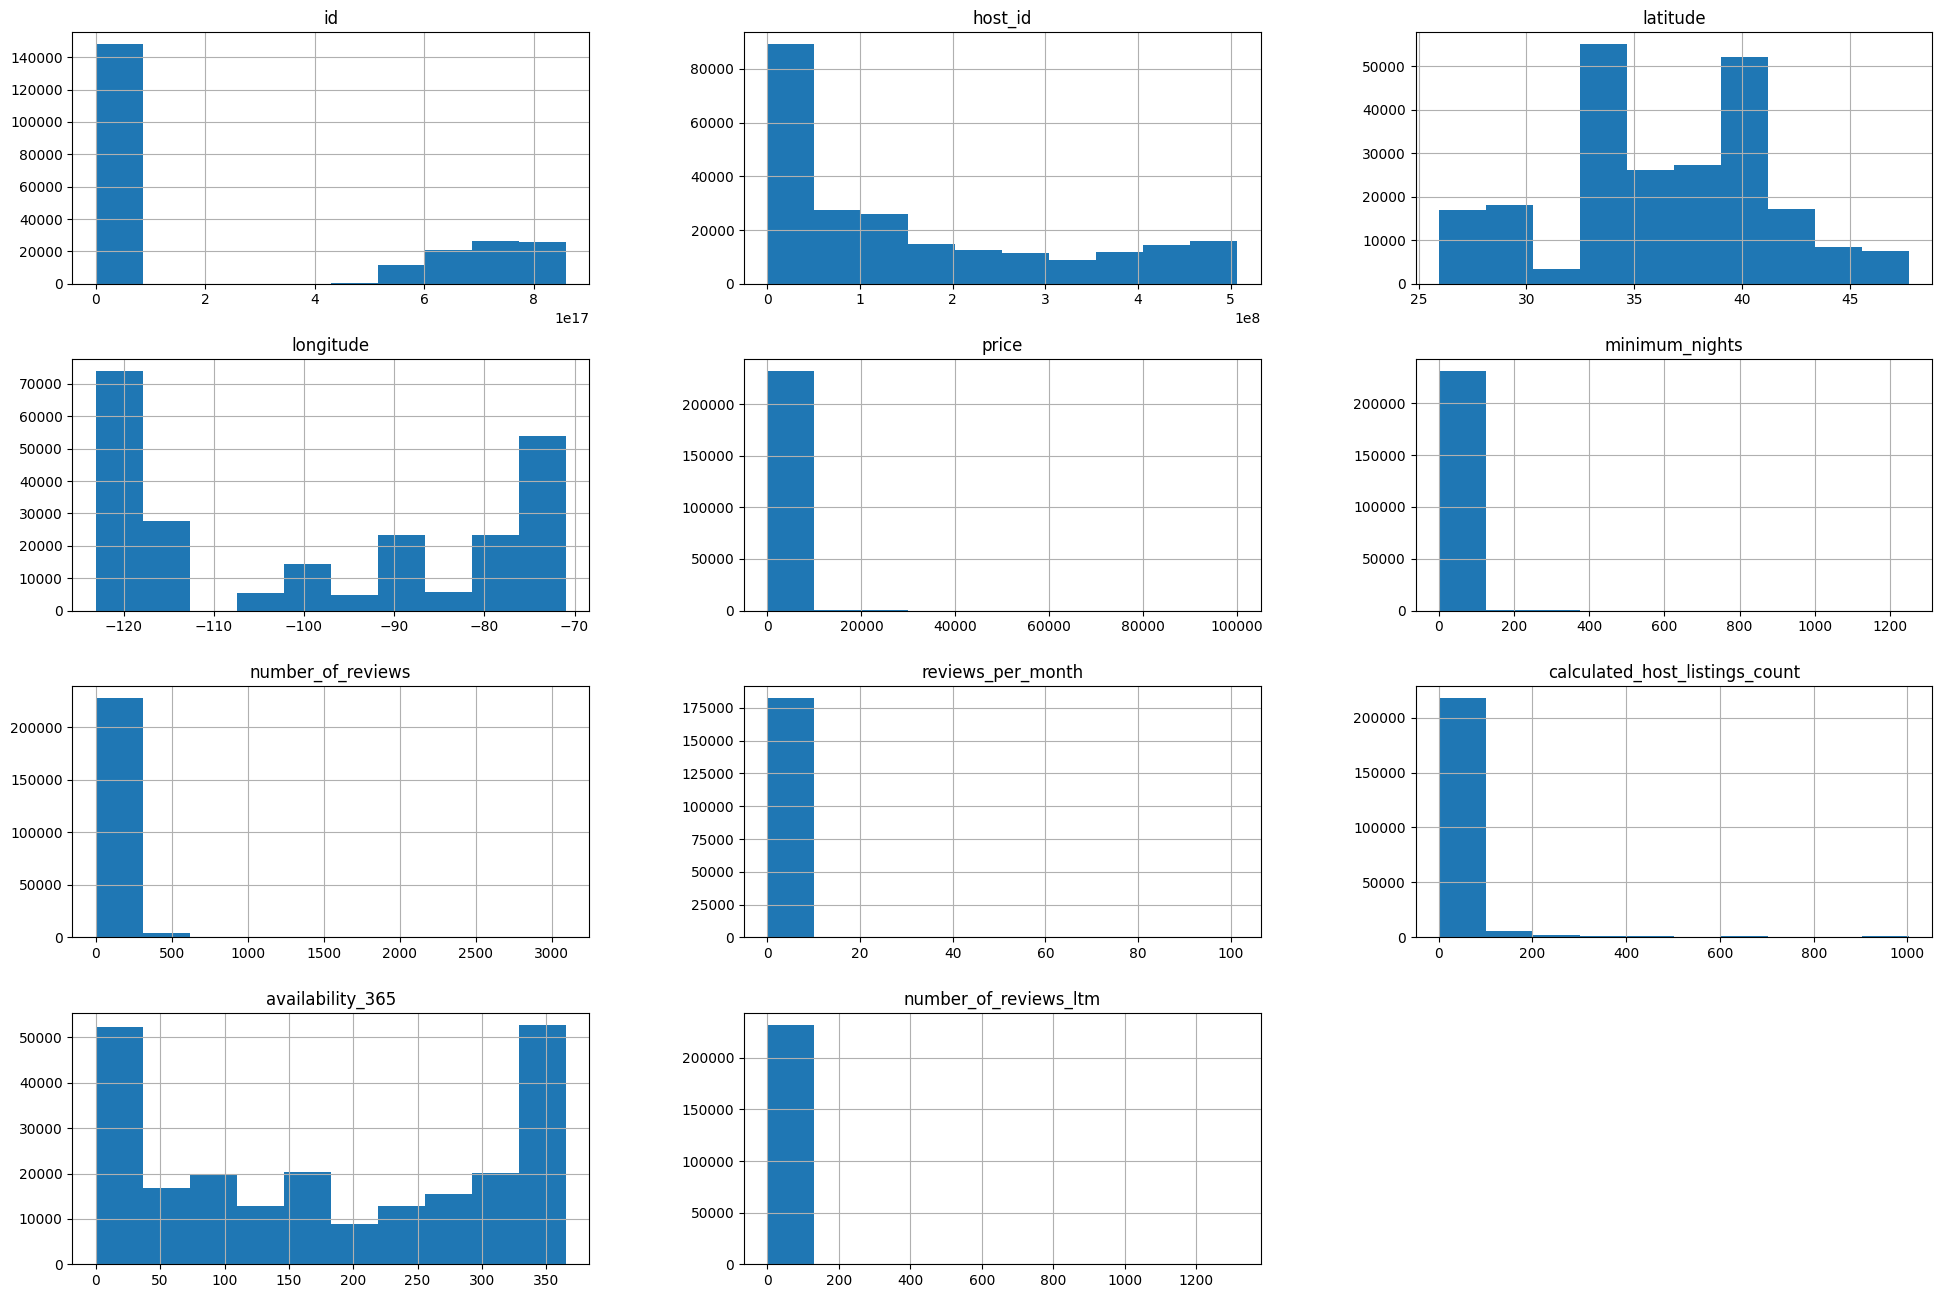

In [229]:
datas.hist(figsize=(24,16))
plt.show()

In [230]:
datas.duplicated().sum()
datas.isna().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

In [231]:
datas["city"].value_counts()

city
New York City         42931
Los Angeles           42451
Broward County        16899
Austin                14368
Clark County          13933
San Diego             12871
Nashville              8548
Chicago                7747
New Orleans            7056
San Francisco          6936
Santa Clara County     6528
Washington D.C.        6455
Seattle                6376
Denver                 5362
Twin Cities MSA        4765
Rhode Island           4742
Portland               4587
Boston                 3864
San Mateo County       3237
Asheville              3161
Oakland                2499
Columbus               2344
Santa Cruz County      1639
Jersey City            1314
Cambridge              1026
Salem                   288
Pacific Grove           220
Name: count, dtype: int64

In [232]:
data1 = datas.drop(labels=["neighbourhood_group", "last_review", "reviews_per_month", "id", "host_id", "name", "host_name", "calculated_host_listings_count", "neighbourhood"], axis = 1)

data1

latitude   longitude        room_type  price  minimum_nights  \
0       37.770280 -122.433170  Entire home/apt    202               2   
1       37.744740 -122.420890  Entire home/apt    235              30   
2       37.765550 -122.452130     Private room     56              32   
3       37.775640 -122.436420  Entire home/apt    575               9   
4       37.760300 -122.421970     Private room    110               1   
...           ...         ...              ...    ...             ...   
232142  37.506164 -122.476188  Entire home/apt    389               2   
232143  37.623630 -122.426570  Entire home/apt    158               1   
232144  37.655661 -122.413130  Entire home/apt     97               1   
232145  37.644792 -122.454213     Private room     62               2   
232146  37.642655 -122.452391     Private room     85               2   

        number_of_reviews  availability_365  number_of_reviews_ltm  \
0                     383               128                     59   
1                     111               365                      0   
2                       9               365                      1   
3                      28               365                      0   
4                     770               159                     34   
...                   ...               ...                    ...   
232142                  0               365                      0   
232143                  0               364                      0   
232144                  0               359                      0   
232145                  0                67                      0   
232146                  0                69                      0   

                    city  
0          San Francisco  
1          San Francisco  
2          San Francisco  
3          San Francisco  
4          San Francisco  
...                  ...  
232142  San Mateo County  
232143  San Mateo County  
232144  San Mateo County  
232145  San Mateo County  
232146  San Mateo County  

[232147 rows x 9 columns]

In [233]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

datas["room_type"].value_counts()

num_cols = data1.select_dtypes(include='number').columns.tolist()
num_cols.remove("price")
num_cols.remove("latitude")
num_cols.remove("longitude")
cat_cols = data1.select_dtypes(exclude='number').columns.tolist()

cat_pipeline = make_pipeline(OneHotEncoder())
num_pipeline = make_pipeline(StandardScaler())
preprocessing = ColumnTransformer([('cat', cat_pipeline, cat_cols), ('num', num_pipeline, num_cols)], remainder='passthrough')


data2 = preprocessing.fit_transform(data1)

names = preprocessing.get_feature_names_out()
data2 = data2.toarray()
data2 = pd.DataFrame(data=data2, columns=names)

Q1 = data2["remainder__price"].quantile(0.25)
Q3 = data2["remainder__price"].quantile(0.50)
IQR = Q3 - Q1
outliers = data2[ (data2["remainder__price"] > Q3 + 1.5 * IQR)]
data2 = data2.drop(outliers.index)

data2

cat__room_type_Entire home/apt  cat__room_type_Hotel room  \
0                                  1.0                        0.0   
1                                  1.0                        0.0   
2                                  0.0                        0.0   
4                                  0.0                        0.0   
5                                  0.0                        0.0   
...                                ...                        ...   
232141                             1.0                        0.0   
232143                             1.0                        0.0   
232144                             1.0                        0.0   
232145                             0.0                        0.0   
232146                             0.0                        0.0   

        cat__room_type_Private room  cat__room_type_Shared room  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               1.0                         0.0   
4                               1.0                         0.0   
5                               1.0                         0.0   
...                             ...                         ...   
232141                          0.0                         0.0   
232143                          0.0                         0.0   
232144                          0.0                         0.0   
232145                          1.0                         0.0   
232146                          1.0                         0.0   

        cat__city_Asheville  cat__city_Austin  cat__city_Boston  \
0                       0.0               0.0               0.0   
1                       0.0               0.0               0.0   
2                       0.0               0.0               0.0   
4                       0.0               0.0               0.0   
5                       0.0               0.0               0.0   
...                     ...               ...               ...   
232141                  0.0               0.0               0.0   
232143                  0.0               0.0               0.0   
232144                  0.0               0.0               0.0   
232145                  0.0               0.0               0.0   
232146                  0.0               0.0               0.0   

        cat__city_Broward County  cat__city_Cambridge  cat__city_Chicago  ...  \
0                            0.0                  0.0                0.0  ...   
1                            0.0                  0.0                0.0  ...   
2                            0.0                  0.0                0.0  ...   
4                            0.0                  0.0                0.0  ...   
5                            0.0                  0.0                0.0  ...   
...                          ...                  ...                ...  ...   
232141                       0.0                  0.0                0.0  ...   
232143                       0.0                  0.0                0.0  ...   
232144                       0.0                  0.0                0.0  ...   
232145                       0.0                  0.0                0.0  ...   
232146                       0.0                  0.0                0.0  ...   

        cat__city_Seattle  cat__city_Twin Cities MSA  \
0                     0.0                        0.0   
1                     0.0                        0.0   
2                     0.0                        0.0   
4                     0.0                        0.0   
5                     0.0                        0.0   
...                   ...                        ...   
232141                0.0                        0.0   
232143                0.0                        0.0   
232144                0.0                        0.0   
232145                0.0           

In [234]:
data2.describe()

cat__room_type_Entire home/apt  cat__room_type_Hotel room  \
count                    169080.00000              169080.000000   
mean                          0.66423                   0.002792   
std                           0.47226                   0.052762   
min                           0.00000                   0.000000   
25%                           0.00000                   0.000000   
50%                           1.00000                   0.000000   
75%                           1.00000                   0.000000   
max                           1.00000                   1.000000   

       cat__room_type_Private room  cat__room_type_Shared room  \
count                169080.000000               169080.000000   
mean                      0.320138                    0.012840   
std                       0.466531                    0.112585   
min                       0.000000                    0.000000   
25%                       0.000000                    0.000000   
50%                       0.000000                    0.000000   
75%                       1.000000                    0.000000   
max                       1.000000                    1.000000   

       cat__city_Asheville  cat__city_Austin  cat__city_Boston  \
count        169080.000000     169080.000000     169080.000000   
mean              0.015070          0.053809          0.017708   
std               0.121831          0.225641          0.131887   
min               0.000000          0.000000          0.000000   
25%               0.000000          0.000000          0.000000   
50%               0.000000          0.000000          0.000000   
75%               0.000000          0.000000          0.000000   
max               1.000000          1.000000          1.000000   

       cat__city_Broward County  cat__city_Cambridge  cat__city_Chicago  ...  \
count             169080.000000        169080.000000      169080.000000  ...   
mean                   0.058582             0.004714           0.038029  ...   
std                    0.234841             0.068495           0.191268  ...   
min                    0.000000             0.000000           0.000000  ...   
25%                    0.000000             0.000000           0.000000  ...   
50%                    0.000000             0.000000           0.000000  ...   
75%                    0.000000             0.000000           0.000000  ...   
max                    1.000000             1.000000           1.000000  ...   

       cat__city_Seattle  cat__city_Twin Cities MSA  \
count      169080.000000              169080.000000   
mean            0.032363                   0.022049   
std             0.176964                   0.146842   
min             0.000000                   0.000000   
25%             0.000000                   0.000000   
50%             0.000000                   0.000000   
75%             0.000000                   0.000000   
max             1.000000                   1.000000   

       cat__city_Washington D.C.  num__minimum_nights  num__number_of_reviews  \
count              169080.000000        169080.000000           169080.000000   
mean                    0.029767             0.057590                0.057271   
std                     0.169944             1.046934                1.088474   
min                     0.000000            -0.447551               -0.507325   
25%                     0.000000            -0.411735               -0.494925   
50%                     0.000000            -0.375919               -0.383331   
75%                     0.000000             0.591110                0.087847   
max                     1.000000            44.286491               37.819261   

       num__availability_365  num__number_of_reviews_ltm  remainder__latitude  \
count          169080.000000               169080.000000        169080.000000   
mean               -0.046530                    0.040184            37.082735   
std           

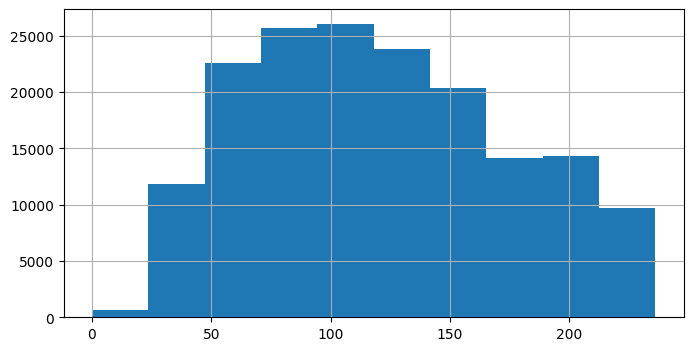

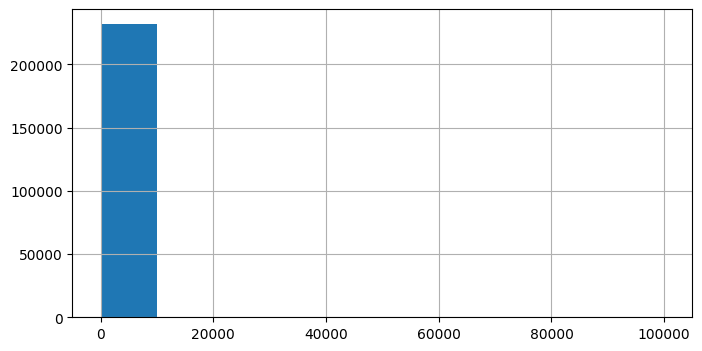

In [235]:
data2["remainder__price"].hist(figsize=(8,4))
plt.show()
datas["price"].hist(figsize=(8,4))
plt.show()

In [236]:
from sklearn.model_selection import train_test_split

X = data2.drop(["remainder__price"], axis = 1)
y = data2["remainder__price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(135264, 37) (135264,) (33816, 37) (33816,)


In [237]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)


LinearRegression()

In [251]:
from sklearn.metrics import mean_squared_error, r2_score

lr_y_predict = lr_model.predict(X_test)

# Calculate MSE
lr_mse = mean_squared_error(y_test, lr_y_predict)

# Calculate R-squared
lr_r2 = r2_score(y_test, lr_y_predict)

# Now you have both MSE and R-squared for the Linear Regression model predictions
print(f"Linear Regression - MSE: {lr_mse}")
print(f"Linear Regression - R-squared: {lr_r2}")


Linear Regression - MSE: 1961.8396463404952
Linear Regression - R-squared: 0.3151476245391822


In [250]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)

Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
# Calculate MSE for Ridge Regression
ridge_mse = mean_squared_error(y_test, Ridge_y_predict)
# Calculate R-squared for Ridge Regression
ridge_r2 = r2_score(y_test, Ridge_y_predict)

# Calculate MSE for Lasso Regression
lasso_mse = mean_squared_error(y_test, Lasso_y_predict)
# Calculate R-squared for Lasso Regression
lasso_r2 = r2_score(y_test, Lasso_y_predict)

# Print the MSE and R-squared for both models
print(f"Ridge Regression - MSE: {ridge_mse}")
print(f"Ridge Regression - R-squared: {ridge_r2}")
print(f"Lasso Regression - MSE: {lasso_mse}")
print(f"Lasso Regression - R-squared: {lasso_r2}")


Ridge Regression - MSE: 1971.567815496151
Ridge Regression - R-squared: 0.3117516488448572
Lasso Regression - MSE: 2051.8371081733912
Lasso Regression - R-squared: 0.2837306962307583


In [240]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-1924.57099825, -1937.96730625, -1934.63360913, -1966.4845626 ,
       -1985.12050472])

In [241]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')

Cross-Validation Mean Score: 1949.7553961897386


In [242]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd

# Split the dataset into %20 test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of machine learning models for evaluation
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

# Initialize the results list
results = []

# Evaluate each model
for name, model in models:
    # Create a pipeline with standardization and the model
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Compute cross-validation scores
    mse_scores = cross_val_score(pipeline, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    r2_scores = cross_val_score(pipeline, X_train, y_train, scoring="r2", cv=5)
    
    # Store the results
    results.append({
        "Model": name,
        "Cross-Validation MSE": -np.mean(mse_scores),
        "Cross-Validation R-squared": np.mean(r2_scores)
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


Model  Cross-Validation MSE  Cross-Validation R-squared
0  Linear Regression           1949.806435                    0.314385
1   Ridge Regression           1951.880763                    0.313657
2   Lasso Regression           1989.420494                    0.300457

In [243]:
import dataframe_image as dfi

# Save the DataFrame as an image
dfi.export(results_df, 'results_df.png')



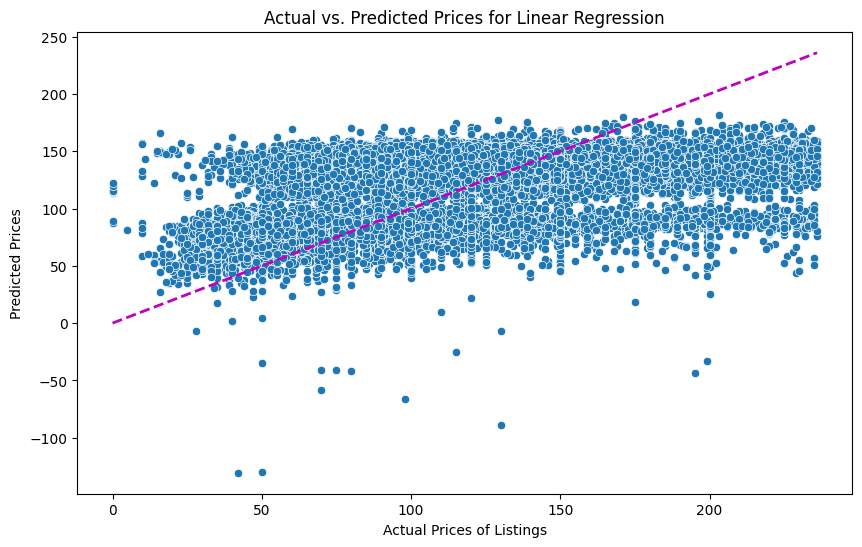

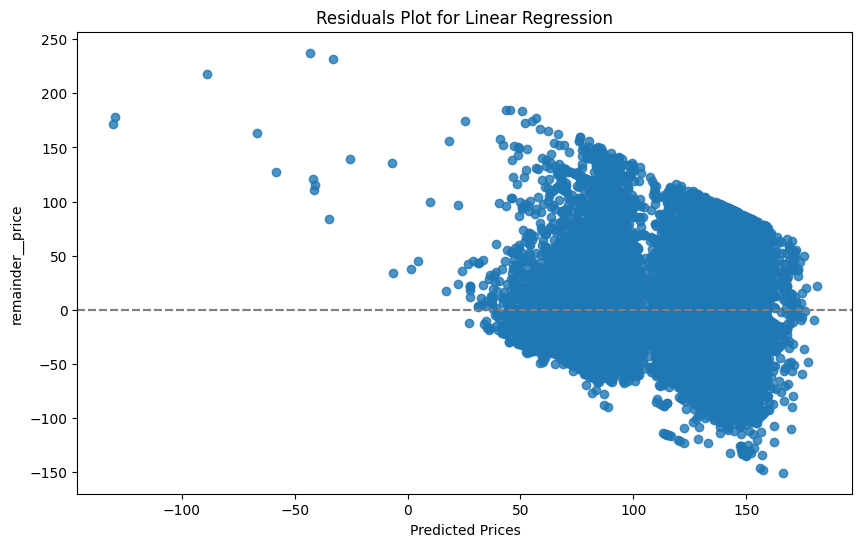

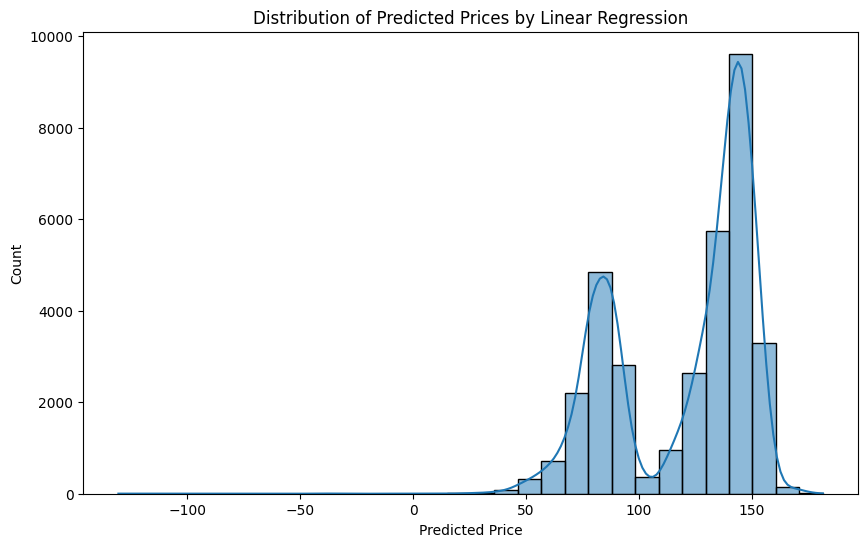

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prediction vs. Actual Values Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lr_y_predict)
plt.xlabel('Actual Prices of Listings')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices for Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=2)

plt.show()

# Residuals Plot without lowess smoothing
residuals = y_test - lr_y_predict
plt.figure(figsize=(10, 6))
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Linear Regression')
sns.residplot(x=lr_y_predict, y=residuals, lowess=False, line_kws={'color': 'red', 'lw': 1})
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

# Histogram of Predicted Prices from Linear Regression
plt.figure(figsize=(10, 6))
plt.title('Distribution of Predicted Prices by Linear Regression')
plt.xlabel('Predicted Price')
plt.ylabel('Count')
sns.histplot(lr_y_predict, bins=30, kde=True)
plt.show()
